### Scenario
Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points
- exploring the structure using decision trees
- exploring clusters in customer behaviour
- can social data (e.g. customer reviews) be used in marketing campaigns

# Linear regression using Python


## 1. Load and explore the data

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the dataset
reviews_df = pd.read_csv('turtle_reviews.csv')
reviews_df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# check the shape of the data
reviews_df.shape

(2000, 11)

In [5]:
#Let's view the 1st 5 rows of dataset
reviews_df.head()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [6]:
#Let's view the last 5 rows of dataset
reviews_df.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [7]:
#Checking the data type and not null values for each column
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [8]:
# Basic descriptive statistics.
reviews_df.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [9]:
# Basic descriptive statistics.
reviews_df.describe(include=object)

,gender,education,language,platform,review,summary
count,2000,2000,2000,2000,2000,2000
unique,2,5,1,1,1980,1432
top,Female,graduate,EN,Web,love it,Five Stars
freq,1120,900,2000,2000,5,378


### Observation

- The data contains 2000 rows and 11 columns
- There is no null value in the datasets
- Gender, Education, Language, Platform, Review and Summary are of type of object
- The age of the reviewer is between 17 and 72
- The minimum loyalty point is 25 and the max is 6847
- The language and platform is only one entry

## 2. Drop columns

In [10]:
# Drop unnecessary columns.
reviews_df.drop(columns=['language','platform'], inplace=True)

In [11]:
print(reviews_df.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [12]:
# Let's rename the renumeraton (KE) to just renumeration and spending_score (1-100) to spending_score

reviews_df.rename(columns={
    'spending_score (1-100)': 'spending_score',
    'remuneration (k£)': 'renumeration'
}, inplace=True)
# View column names.
reviews_df.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [13]:
reviews=reviews_df.copy()

## 4. Check for missing value

In [14]:
reviews.isna().sum()

gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

## 5. Save the DataFrame as a CSV file

In [15]:
# Create a CSV file as output.
output_filename = 'reviews_output.csv'
reviews.to_csv(output_filename, index=False)

In [16]:
reviews

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 6. Data Exploration

#### Age VS Loyalty Point

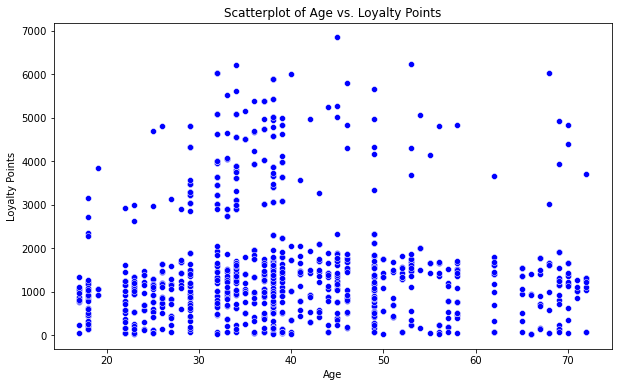

In [19]:
# Scatterplot of Age vs. Loyalty Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='loyalty_points', data=reviews, color='blue')
plt.title('Scatterplot of Age vs. Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()

- Age and loyalty point does not really show a partten, it shows that loyalty point does not really depend on age of reviewer

####     a. Distribution of loyalty point

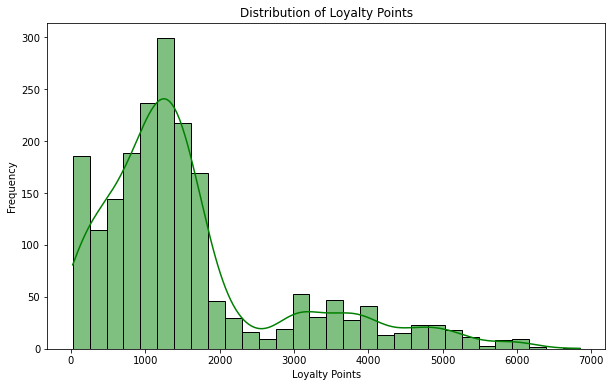

In [18]:
# Histogram of Loyalty Points
plt.figure(figsize=(10, 6))
sns.histplot(reviews['loyalty_points'], bins=30, kde=True, color='green')
plt.title('Distribution of Loyalty Points')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')
plt.show()

- The distribution of the loyalty point skewed to the right, it shows that most reviewers has loyalty point between 0 to 2000

### Education Vs Loyalty point

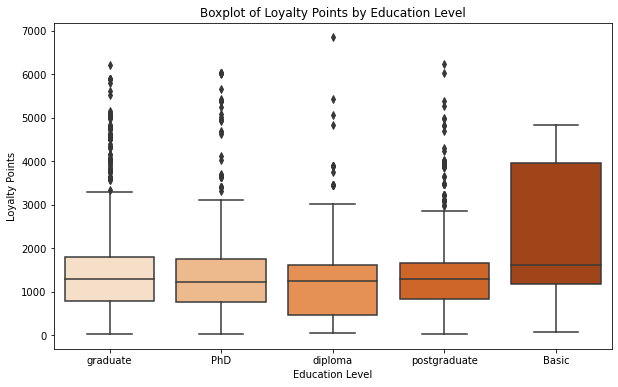

In [23]:
# Boxplot of Loyalty Points by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='loyalty_points', data=reviews, palette='Oranges')
plt.title('Boxplot of Loyalty Points by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Loyalty Points')
plt.show()

- The boxplot above shows the lower the level of education the higher the loyalty point

### Gender vs Loyalty

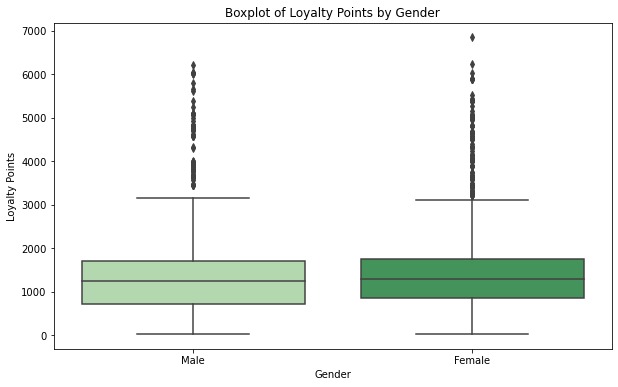

In [24]:
# Boxplot of Loyalty Points by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='loyalty_points', data=reviews, palette='Greens')
plt.title('Boxplot of Loyalty Points by Gender')
plt.xlabel('Gender')
plt.ylabel('Loyalty Points')
plt.show()

- Loyalty point does not depend on gender

## 5. Linear regression

### 5a) spending vs loyalty

In [25]:
# Define independent variable.

X = reviews['spending_score']
# Define dependent variable.
y = reviews['loyalty_points']

# Add a constant to the independent variable (for the intercept)
X_const = sm.add_constant(X)

# Create the model and fit it
model = sm.OLS(y, X_const).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          2.92e-263
Time:                        19:53:56   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [26]:
# Extract the estimated parameters (coefficients)
estimated_parameters = model.params
print("Estimated Parameters:")
print(estimated_parameters)

# Extract the standard errors
standard_errors = model.bse
print("\nStandard Errors:")
print(standard_errors)

# Extract the predicted values
predicted_values = model.predict(X_const)
print("\nPredicted Values:")
print(predicted_values)


Estimated Parameters:
const            -75.052663
spending_score    33.061693
dtype: float64

Standard Errors:
const             45.930554
spending_score     0.814419
dtype: float64

Predicted Values:
0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Length: 2000, dtype: float64


In [27]:
# Extract the t-values
t_values = model.tvalues

# Extract the p-values
p_values = model.pvalues

In [28]:
# Set the X coefficient and the constant to generate the regression table.

# Create a summary DataFrame
regression_table = pd.DataFrame({
    'Coefficient': estimated_parameters,
    'Standard Error': standard_errors,
    't-value': t_values,
    'p-value': p_values
})

# View the output
print("Regression Table:")
print(regression_table)


Regression Table:
                Coefficient  Standard Error    t-value        p-value
const            -75.052663       45.930554  -1.634047   1.024066e-01
spending_score    33.061693        0.814419  40.595459  2.916295e-263


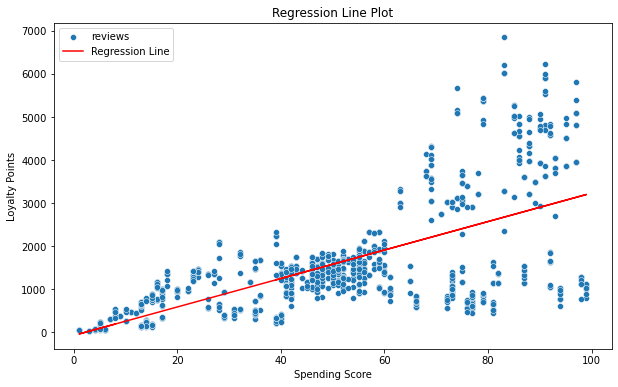

In [26]:
# Extract the predicted values
predicted_values = model.predict(X_const)

# Plot the scatter plot of the actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, label='reviews')

# Plot the regression line
plt.plot(X, predicted_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Regression Line Plot')
plt.legend()

# Show the plot
plt.show()


### 5b) renumeration vs loyalty

In [29]:
# Step 1: Define independent and dependent variables
X1 = reviews['renumeration']  # Independent variable
y = reviews['loyalty_points']  # Dependent variable

# Step 2: Add a constant to the independent variable for the intercept
X1_const = sm.add_constant(X1)

# Step 3: Create the model and fit it
model = sm.OLS(y, X1_const).fit()

# Print the summary of the model
print(model.summary())

# Step 4: Extract and print the statistics
estimated_parameters = model.params
standard_errors = model.bse
predicted_values = model.predict(X1_const)
t_values = model.tvalues
p_values = model.pvalues

# Print the extracted statistics
print("Estimated Parameters:")
print(estimated_parameters)
print("\nStandard Errors:")
print(standard_errors)
print("\nPredicted Values:")
print(predicted_values)
print("\nt-values:")
print(t_values)
print("\np-values:")
print(p_values)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 06 Jul 2024   Prob (F-statistic):          2.43e-209
Time:                        19:54:36   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [30]:
# Set the the X coefficient and the constant to generate the regression table.

# Create a summary DataFrame
regression_table = pd.DataFrame({
    'Coefficient': estimated_parameters,
    'Standard Error': standard_errors,
    't-value': t_values,
    'p-value': p_values
})

# View the output
print("Regression Table:")
print(regression_table)


Regression Table:
              Coefficient  Standard Error    t-value        p-value
const          -65.686513       52.170717  -1.259069   2.081526e-01
renumeration    34.187825        0.977925  34.959541  2.430175e-209


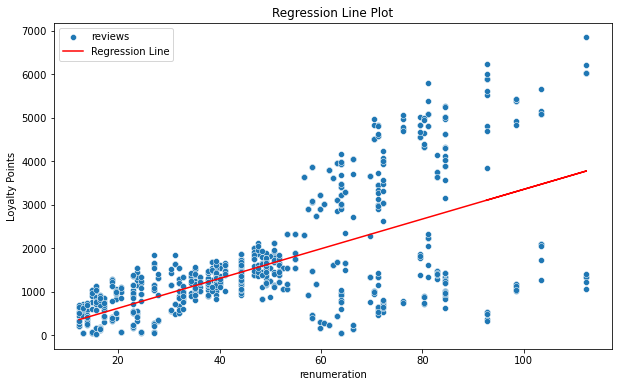

In [31]:
# Extract the predicted values
predicted_values = model.predict(X1_const)

# Plot the scatter plot of the actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X1, y=y, label='reviews')

# Plot the regression line
plt.plot(X1, predicted_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('renumeration')
plt.ylabel('Loyalty Points')
plt.title('Regression Line Plot')
plt.legend()

# Show the plot
plt.show()

### 5c) age vs loyalty

In [32]:
# Define independent variable.
# Step 1: Define independent and dependent variables
X2 = reviews['age']  # Independent variable
y = reviews['loyalty_points']  # Dependent variable

# Step 2: Add a constant to the independent variable for the intercept
X2_const = sm.add_constant(X2)

# Step 3: Create the model and fit it
model = sm.OLS(y, X2_const).fit()

# Print the summary of the model
print(model.summary())

# Step 4: Extract and print the statistics
estimated_parameters = model.params
standard_errors = model.bse
predicted_values = model.predict(X2_const)
t_values = model.tvalues
p_values = model.pvalues

# Print the extracted statistics
print("Estimated Parameters:")
print(estimated_parameters)
print("\nStandard Errors:")
print(standard_errors)
print("\nPredicted Values:")
print(predicted_values)
print("\nt-values:")
print(t_values)
print("\np-values:")
print(p_values)


                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 06 Jul 2024   Prob (F-statistic):             0.0577
Time:                        19:55:26   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [33]:
# Set the the X coefficient and the constant to generate the regression table.

# Create a summary DataFrame
regression_table = pd.DataFrame({
    'Coefficient': estimated_parameters,
    'Standard Error': standard_errors,
    't-value': t_values,
    'p-value': p_values
})

# View the output
print("Regression Table:")
print(regression_table)


Regression Table:
       Coefficient  Standard Error    t-value       p-value
const  1736.517739       88.248731  19.677538  6.192703e-79
age      -4.012805        2.113177  -1.898944  5.771573e-02


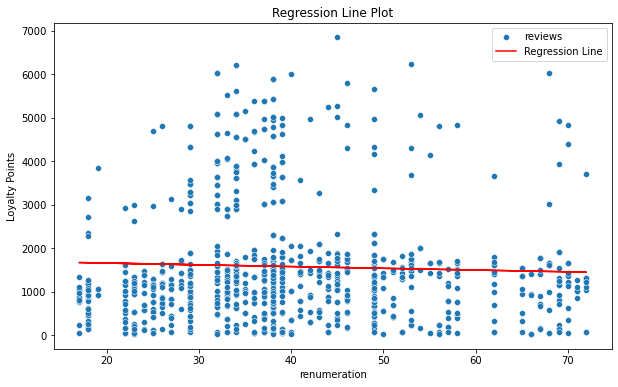

In [34]:
# Extract the predicted values
predicted_values = model.predict(X2_const)

# Plot the scatter plot of the actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X2, y=y, label='reviews')

# Plot the regression line
plt.plot(X2, predicted_values, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('renumeration')
plt.ylabel('Loyalty Points')
plt.title('Regression Line Plot')
plt.legend()

# Show the plot
plt.show()

## 6. Observations and insights

***Observation***

1. Spending VS Loyalty

    - The Rsqauare value of 0.45 indicates that 45% of the variability in loyalty points is explained by the spending score which means that 55% of loyalty point depend on other factor aside the Spending score
    - The F value of 1648 suggest that the model is significant statistically overall
    -The p-value associated with the F-statistic is approximately 0.102, which is higher than the common alpha level of 0.05. This suggests that the model is not statistically significant at the 5% significance level. In other words, there is a more than 10% chance that the observed relationship between spending score and loyalty points could be due to random variation rather than a true underlying relationship.

2. Renumeration vs Loyalty

    - The Rsquare of 0.38 suggest that the loyalty point is 38% depend on the renumeration
    - The F value of of 1222 is lower than 1648 of the spending score is shows that the model on the renumeration is less significant than than the spending score
    - The P value of 0.2 is higher than the p value of spending and also higher than 0.05.
    
3. Age vs Loyalty
    - The low value of Rsquare(0.002) and F value (1222) shows that the model doesn't explain the variance between age and loyalty point
    - a low p value suggest that despite the low explanatory power of the model the there is still a significant relationship between age and loyalty point.





# Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## 1. Load and prepare the data

In [35]:
# Import all the necessary packages
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [36]:
# Create your new DataFrame.
dt_review = reviews.copy()
dt_review

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [37]:
# Splitting the data into input and the target column
X = dt_review.drop("loyalty_points", axis=1)
y = dt_review["loyalty_points"]

In [38]:
# Review X and Y.
X = pd.get_dummies(X, drop_first=True)

## 2. Create train and test data sets.

In [39]:
# Split the data into test and train data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [40]:
X_train.shape, X_test.shape

((1400, 3419), (600, 3419))

## 3. Create Decision tree regressor

In [41]:
# Initialize the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree Regressor to the training data
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [42]:
dt_y_pred = decision_tree_regressor.predict(X_test)


## 4. Fit and plot final model.

In [43]:
# Calculate evaluation metrics
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
accuracy = metrics.accuracy_score(y_test, dt_y_pred)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", dt_mae)
print("R-squared (R2):", dt_r2)
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred)) 

Mean Absolute Error (MAE): 29.015
R-squared (R2): 0.9948807752895705
Accuracy: 0.715


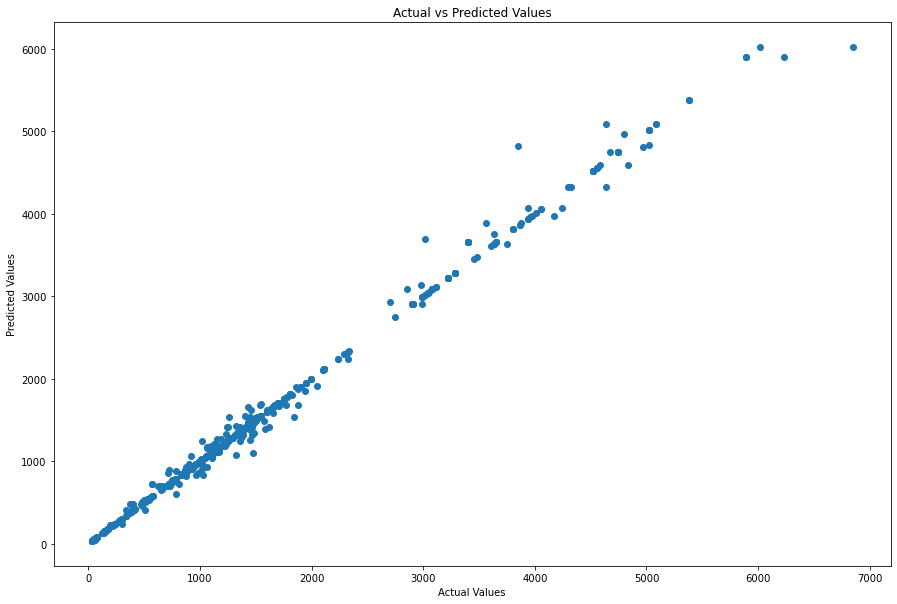

In [42]:
plt.scatter(y_test, dt_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [44]:
# Prune the model.
# Initialize the Decision Tree Regressor without pruning
tree_regressor = DecisionTreeRegressor(random_state=42)
path = tree_regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize an empty list to store the results of each alpha
models = []

# Train a decision tree with each value of alpha and store the models
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    models.append(tree)

Optimal alpha: 7.56
Mean Squared Error (MSE): 8068.520896255799
R-squared: 0.9947507923394541


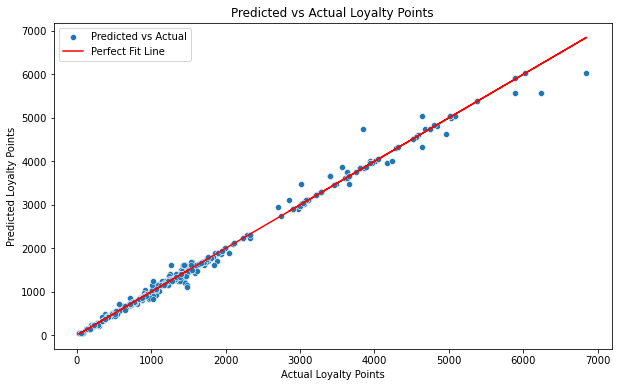

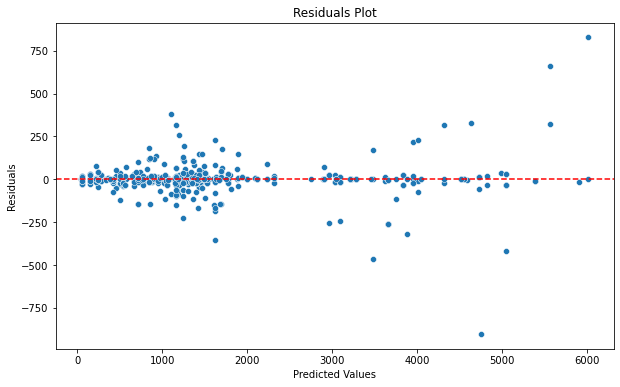

In [45]:
# Calculate the MSE for each model on the test set
mse_values = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

# Find the optimal alpha that minimizes the MSE
optimal_alpha = ccp_alphas[np.argmin(mse_values)]
print(f'Optimal alpha: {optimal_alpha}')

# Train the final model with the optimal alpha
final_tree_regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
final_tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_tree_regressor.predict(X_test)

# Evaluate the final model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
 
# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Perfect Fit Line')
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Predicted Loyalty Points')
plt.title('Predicted vs Actual Loyalty Points')
plt.legend()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

## 5. Discuss: Insights and observations

1. The model has an accuracy before prunning is 72%, the rsquare is 0.99488 and MAE is 29.2
2. After prunning the model using cost complexity approcah the Mae of the model jump to 8068 and the rsquare 0.99474 

The model perform better before prunning

# 

# Clustering with *k*-means using Python



## 1. Load and explore the data

In [46]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Load the CSV file(s) as df2.
k_review = reviews.copy()

# View DataFrame.
k_review

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [48]:
# Drop unnecessary columns.
k_review.drop(columns=['review','summary','education'],inplace=True)
# View DataFrame.
k_review

,gender,age,renumeration,spending_score,loyalty_points,product
0,Male,18,12.30,39,210,453
1,Male,23,12.30,81,524,466
2,Female,22,13.12,6,40,254
3,Female,25,13.12,77,562,263
4,Female,33,13.94,40,366,291
...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,977
1996,Female,43,92.66,8,539,979
1997,Male,34,92.66,91,5614,1012
1998,Male,34,98.40,16,1048,1031


#### Scaling the data

In [49]:
scaler = StandardScaler()
scaled_review = pd.DataFrame(
    scaler.fit_transform(k_review.drop(["gender", "age"], axis=1)),
    columns=k_review.drop(["gender", "age"], axis=1).columns,
)
scaled_review.head()

,renumeration,spending_score,loyalty_points,product
0,-1.547658,-0.421647,-1.066343,-1.228506
1,-1.547658,1.188278,-0.821589,-1.224376
2,-1.512188,-1.686588,-1.198854,-1.291717
3,-1.512188,1.034952,-0.791969,-1.288858
4,-1.476718,-0.383315,-0.944746,-1.279964


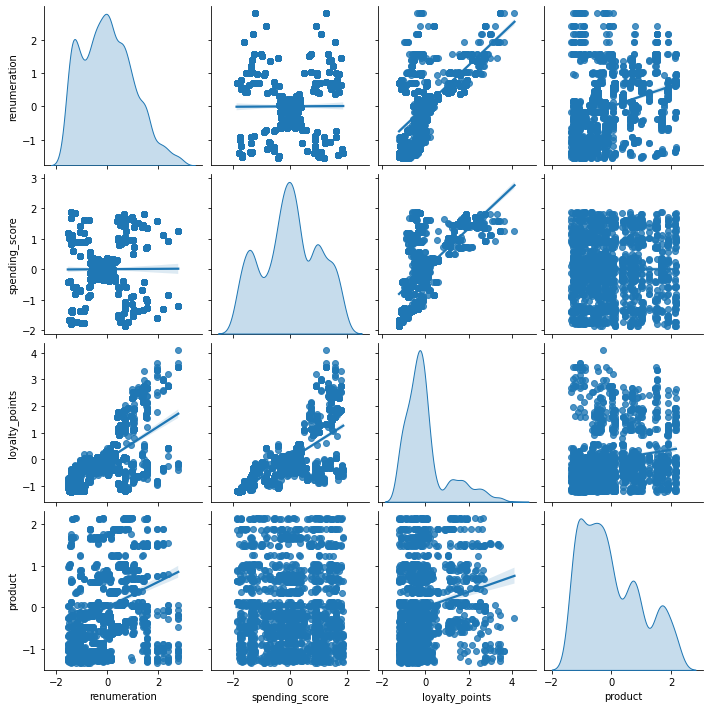

In [50]:
# Explore the data.
# Pair-plot analysis
sns.pairplot(scaled_review,kind='reg',diag_kind="kde");

### K-means Clustering

Number of Clusters: 1 	Average Distortion: 1.7987056453713537
Number of Clusters: 2 	Average Distortion: 1.4783942042695968
Number of Clusters: 3 	Average Distortion: 1.247870201291777
Number of Clusters: 4 	Average Distortion: 1.1154275160391234
Number of Clusters: 5 	Average Distortion: 0.9871113005265602
Number of Clusters: 6 	Average Distortion: 0.8698171187624464
Number of Clusters: 7 	Average Distortion: 0.8253001222186099
Number of Clusters: 8 	Average Distortion: 0.7845515503598386
Number of Clusters: 9 	Average Distortion: 0.7449126134413717


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

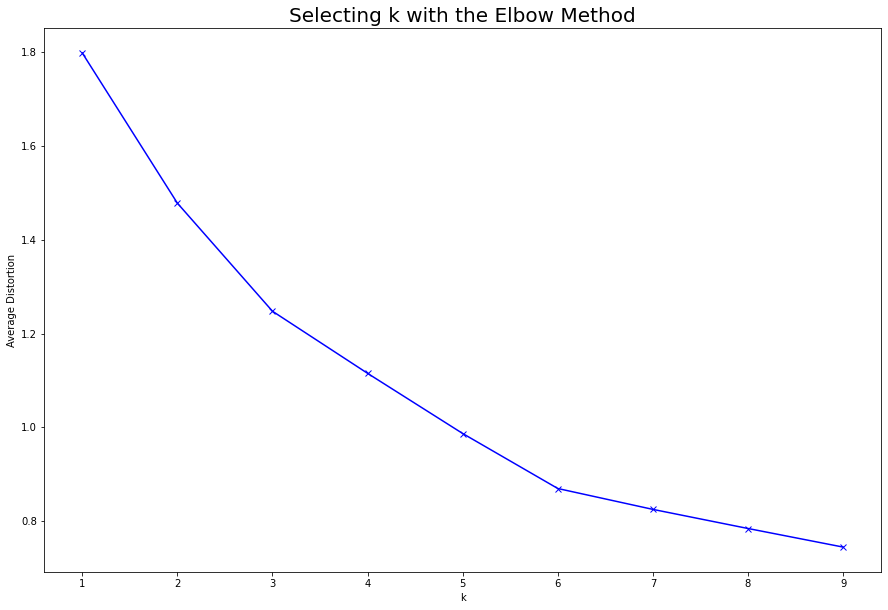

In [51]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_review)
    prediction=model.predict(scaled_review)
    distortion=sum(np.min(cdist(scaled_review, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_review.shape[0]

    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

### silhoutte score

In [52]:
# checking silhoutte score

sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_review))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_review, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41401286539341)
For n_clusters = 3, silhouette score is 0.35975800375928996)
For n_clusters = 4, silhouette score is 0.3627656403091769)
For n_clusters = 5, silhouette score is 0.38037979001716193)
For n_clusters = 6, silhouette score is 0.3993097343990471)
For n_clusters = 7, silhouette score is 0.39037152590677515)
For n_clusters = 8, silhouette score is 0.3971002041316813)
For n_clusters = 9, silhouette score is 0.3974054222833477)


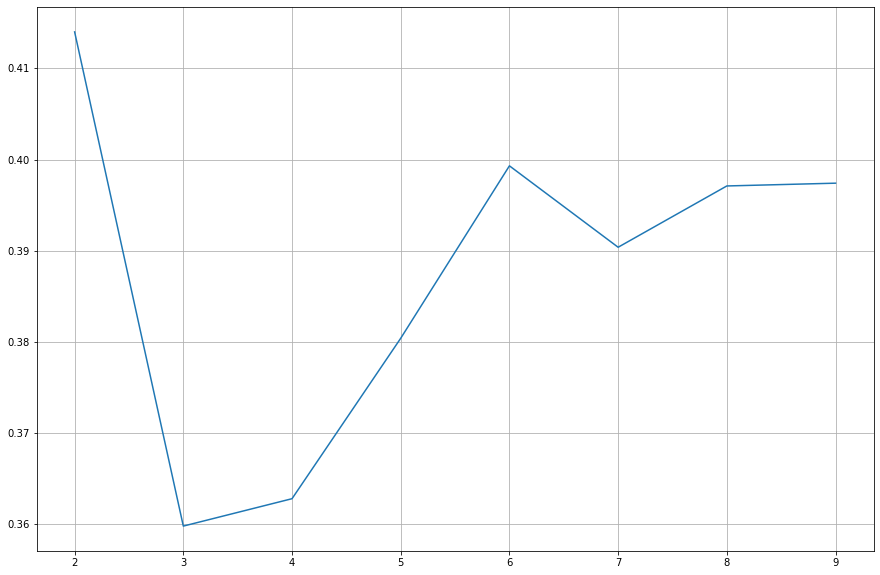

In [53]:
plt.plot(cluster_list,sil_score)
plt.grid()

In [54]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_review)

KMeans(n_clusters=3, random_state=0)

In [55]:
df3=k_review[['renumeration','loyalty_points']]

### 5. Evaluate and fit the model

#### using k=5

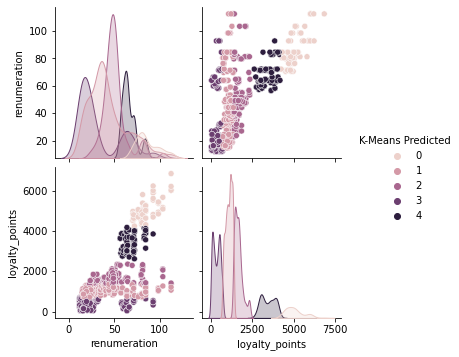

In [56]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df3)

clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [57]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

1    687
2    517
3    442
4    230
0    124
Name: K-Means Predicted, dtype: int64

In [58]:
# View the K-Means predicted.
print(df3.head())

   renumeration  loyalty_points  K-Means Predicted
0         12.30             210                  3
1         12.30             524                  3
2         13.12              40                  3
3         13.12             562                  3
4         13.94             366                  3


<AxesSubplot:xlabel='renumeration', ylabel='loyalty_points'>

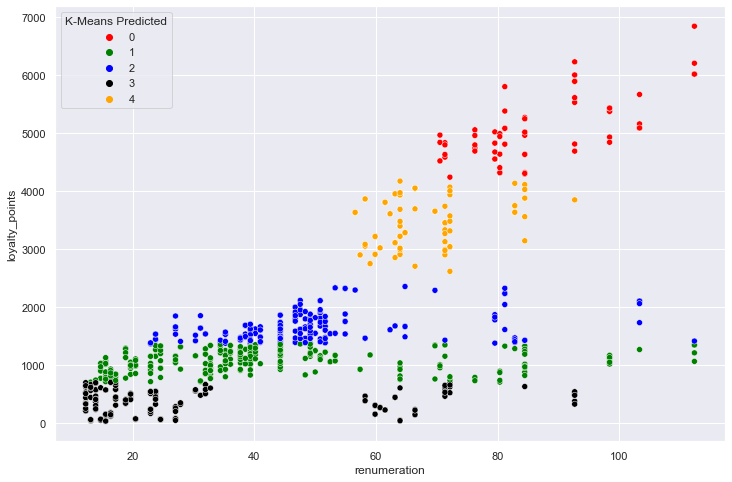

In [59]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='loyalty_points',
                data=df3 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

- the runmeration are overlapping here for example 12.30 appeared in both cluster 0 and 1, we can not use the k=5, let's try k=4

#### Using k = 4

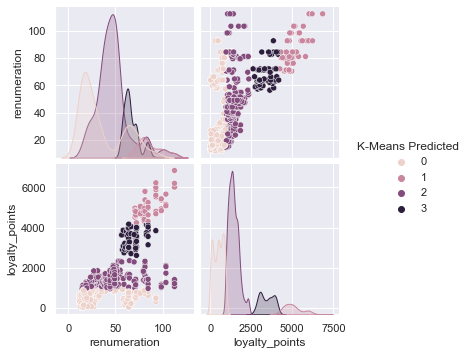

In [60]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df3)

clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [61]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

2    994
0    652
3    230
1    124
Name: K-Means Predicted, dtype: int64

In [62]:
# View the K-Means predicted.
print(df3.head())

   renumeration  loyalty_points  K-Means Predicted
0         12.30             210                  0
1         12.30             524                  0
2         13.12              40                  0
3         13.12             562                  0
4         13.94             366                  0


<AxesSubplot:xlabel='renumeration', ylabel='loyalty_points'>

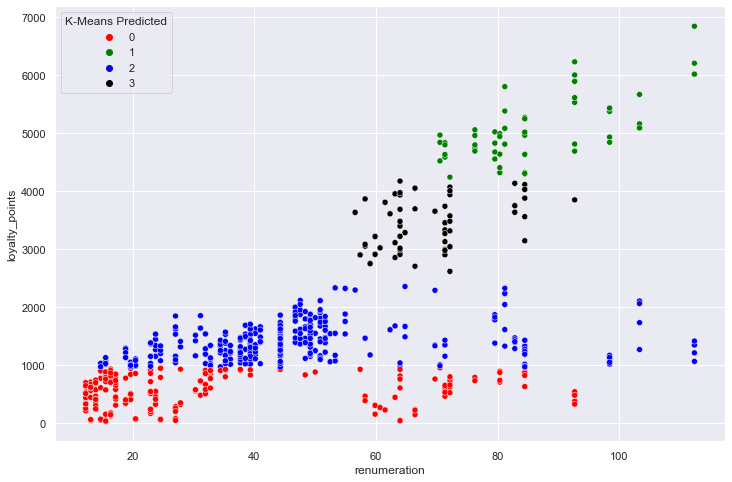

In [63]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='loyalty_points',
                data=df3 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

#### **Using k = 3**

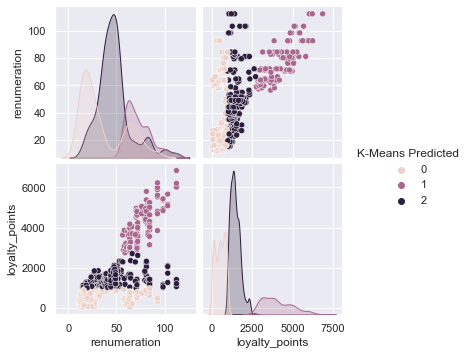

In [64]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df3)

clusters = kmeans.labels_
df3['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [65]:
# Check the number of observations per predicted class.
df3['K-Means Predicted'].value_counts()

2    977
0    671
1    352
Name: K-Means Predicted, dtype: int64

In [66]:
# View the K-Means predicted.
print(df3.head())

   renumeration  loyalty_points  K-Means Predicted
0         12.30             210                  0
1         12.30             524                  0
2         13.12              40                  0
3         13.12             562                  0
4         13.94             366                  0


<AxesSubplot:xlabel='renumeration', ylabel='loyalty_points'>

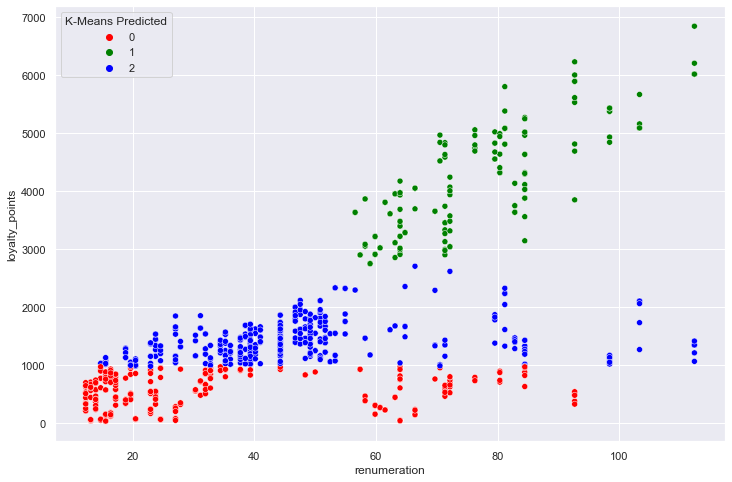

In [67]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='loyalty_points',
                data=df3 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

In [68]:
df3['K_means_segments'] = kmeans.labels_
scaled_review['K_means_segments'] = kmeans.labels_

In [69]:
cluster_profile = df3.groupby('K_means_segments').mean()

In [70]:
cluster_profile['count_in_each_segments'] = df3.groupby('K_means_segments')['loyalty_points'].count().values

In [71]:
cluster_profile


,renumeration,loyalty_points,K-Means Predicted,count_in_each_segments
K_means_segments,,,,
0,35.581401,508.108793,0.0,671
1,73.296818,4005.250000,1.0,352
2,47.576786,1438.357216,2.0,977


## 2. Plot

## 7. Discuss: Insights and observations

- The best cluster to group the data into is 3 clusters, it best describe the data

**Cluster 2**

- There are 977 reveiwers in this cluster.
- The average loyalty points in this cluster is 1438.36 and their average renumeration is 47.57

**Cluster 1**

- There are 352 players in this cluster.
- Reviewers in this cluster has the highest loyalty points and highers renumerations

**Cluster 0***

- They contain 671 reviewers
- They have the lowest rnumeration and loyalty points



# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [72]:
!pip install textblob

In [73]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [74]:
# Load the data set as df3.
df3=reviews_df.copy()

# View DataFrame.

df3

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [75]:
# Explore data set.
df3.isna().sum()

gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

- There is no missing value in the data

In [76]:
df3[df3.duplicated()].count()


gender            0
age               0
renumeration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

- There is no missing value in the data

In [77]:
# Keep necessary columns. Drop unnecessary columns.

df3.drop(columns=["gender","age","renumeration","spending_score","loyalty_points","education","product"], inplace=True)
# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [78]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [79]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [80]:
# Remove punctuation in review column
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [81]:
# Remove punctuation in review column
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()


0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [82]:
# Check the number of duplicate values in the COMMENTS column.
df3.review.duplicated().sum()

50

In [83]:
# Drop duplicates in both columns.
nlp_df = df3.drop_duplicates(subset=['review'])

# Preview data.
nlp_df.reset_index(inplace=True)
nlp_df.head()

# View DataFrame.
nlp_df

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1945,1994,we are retired and find this a great way to st...,a great mind game
1946,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1947,1996,great game did not think i would like it when ...,super fun
1948,1997,great game for all keeps the mind nimble,great game


## 3. Tokenise and create wordclouds

In [84]:
# Create new DataFrame (copy DataFrame).

df4=nlp_df.copy()
# View DataFrame.
df4

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1945,1994,we are retired and find this a great way to st...,a great mind game
1946,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1947,1996,great game did not think i would like it when ...,super fun
1948,1997,great game for all keeps the mind nimble,great game


In [85]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\BUYPC
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Tokenization

In [86]:
# Tokenise the words.
df4['tokens'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [87]:
# Define an empty list of tokens.
all_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4['tokens'][i]

In [88]:
# Review: Create a word cloud.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [89]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [90]:
### Eliminate Stopwords

In [91]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to C:\Users\BUYPC
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Due consistence error gotten from creating wordcloud we will not be creating wordcloud**

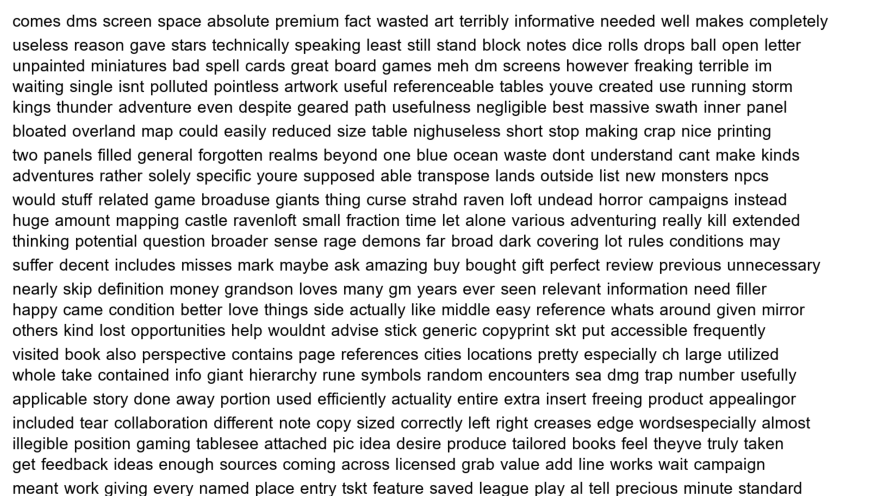

In [92]:
from PIL import Image, ImageDraw, ImageFont

if 'tokens' not in df4.columns:
    print("Tokenizing the review column...")
    df4['tokens'] = df4['review'].apply(word_tokenize)

# Example tokenized words list from df4 DataFrame
tokens_list = df4['tokens'].tolist()

# Flatten the list of lists and join tokens into a single string
tokens2_list = [item for sublist in tokens_list for item in sublist]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens2_list if word.isalpha() and word.lower() not in stop_words]

# Get the word frequencies
word_freq = Counter(filtered_tokens)

# Set up the image
width, height = 1600, 900
background_color = 'white'
image = Image.new('RGB', (width, height), color=background_color)
draw = ImageDraw.Draw(image)

# Set font
font_path = 'arial.ttf'  
font_size = 30
font = ImageFont.truetype(font_path, font_size)

# Draw words
x, y = 10, 10
for word, freq in word_freq.items():
    draw.text((x, y), word, font=font, fill=(0, 0, 0))
    x += font.getsize(word)[0] + 10
    if x >= width - 200:  # Adjust line width
        x = 10
        y += font.getsize(word)[1] + 10

# Convert to a format that can be displayed with matplotlib
image = image.convert("RGB")

# Display the image using matplotlib
plt.figure(figsize=(16, 9))
plt.imshow(image)
plt.axis('off')
plt.show()

## 4. Frequency distribution and polarity
### Create frequency distribution

In [93]:
# Tokenise the words.
df4['tokens'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

### Identify 15 most common words and polarity

In [94]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'game': 1668, 'great': 579, 'fun': 549, 'one': 530, 'play': 502, 'like': 414, 'love': 322, 'really': 319, 'get': 319, 'cards': 301, ...})

In [95]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


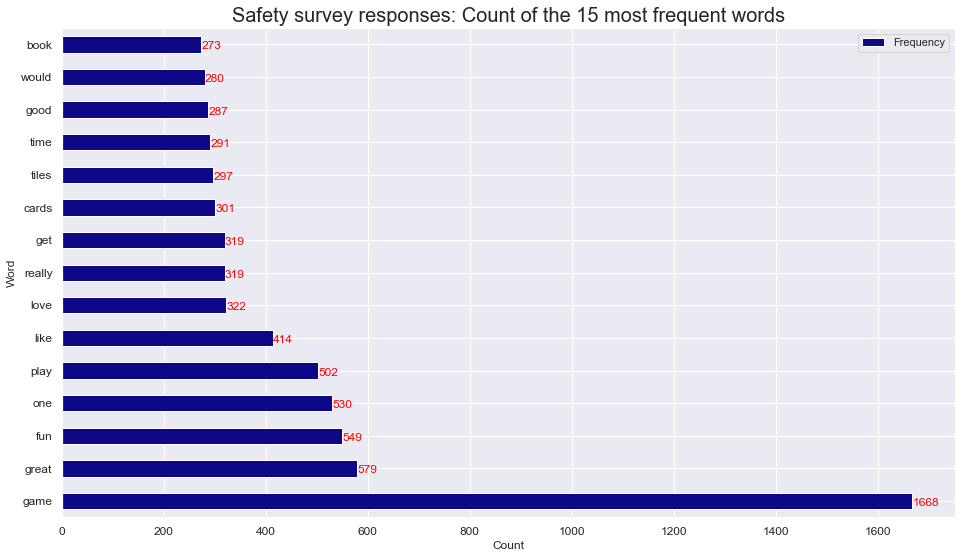

In [96]:
# Determine the 15 most common words.

# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

- The most frequently use word is game, follow by great and fun

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

### Polarity and subjectivity of the review

In [97]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

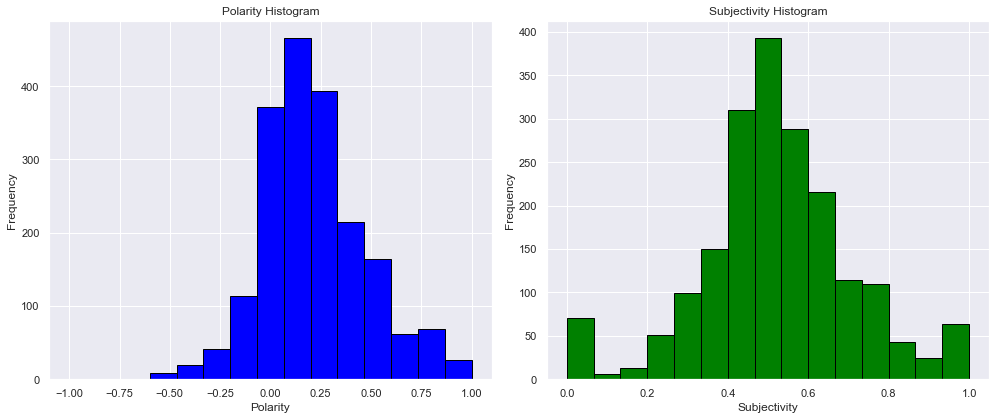

In [98]:
# Calculate polarity and sentiment scores using TextBlob
df4['polarity'] = df4['review'].apply(lambda review: TextBlob(review).sentiment.polarity)
df4['subjectivity'] = df4['review'].apply(lambda review: TextBlob(review).sentiment.subjectivity)

# Plot histograms
plt.figure(figsize=(14, 6))

# Polarity Histogram
plt.subplot(1, 2, 1)
plt.hist(df4['polarity'], bins=15, color='blue', edgecolor='black')
plt.title('Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity Histogram
plt.subplot(1, 2, 2)
plt.hist(df4['subjectivity'], bins=15, color='green', edgecolor='black')
plt.title('Subjectivity Histogram')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Polarity and subjectivity of the summary

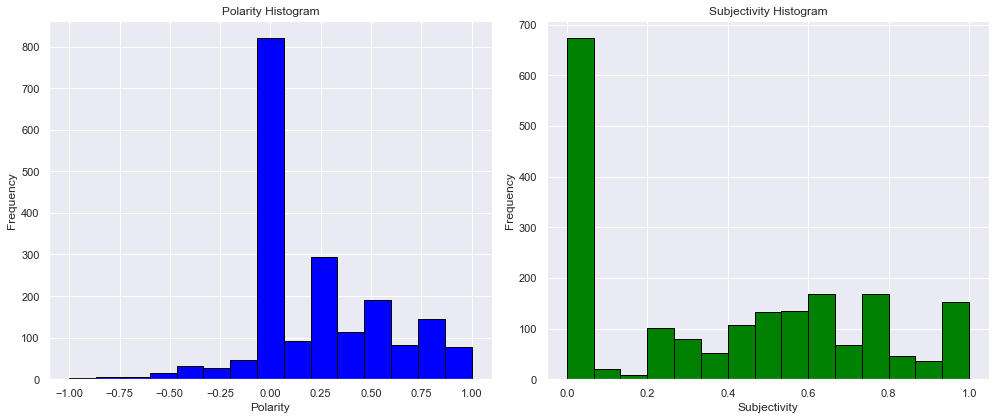

In [99]:
# Calculate polarity and sentiment scores using TextBlob
df4['polarity'] = df4['summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
df4['subjectivity'] = df4['summary'].apply(lambda review: TextBlob(review).sentiment.subjectivity)

# Plot histograms
plt.figure(figsize=(14, 6))

# Polarity Histogram
plt.subplot(1, 2, 1)
plt.hist(df4['polarity'], bins=15, color='blue', edgecolor='black')
plt.title('Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity Histogram
plt.subplot(1, 2, 2)
plt.hist(df4['subjectivity'], bins=15, color='green', edgecolor='black')
plt.title('Subjectivity Histogram')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

#### Top 20 Positive and negative review

In [100]:
# Sort reviews based on polarity scores
df4_sorted = df4.sort_values(by='polarity', ascending=False)

# Identify top 20 positive reviews
top_20_positive_reviews = df4_sorted.head(20)

# Identify top 20 negative reviews
top_20_negative_reviews = df4_sorted.tail(20)

# Display the top 20 positive reviews and their summaries
print("Top 20 Positive Reviews:")
print(top_20_positive_reviews[['review']])

# Display the top 20 negative reviews and their summaries
print("Top 20 Negative Reviews and Summaries:")
print(top_20_negative_reviews[['review']])

Top 20 Positive Reviews:
                                                 review
591   wow this product is incredible i was hesitant ...
1363  love this can expand current game with some ne...
536   this is a great game to play with kids of diff...
80    my daughter loves these little books theyre th...
541   i am a therapist for children and this game is...
1599  fun way for the children to learn counting and...
1427  me and my wife play lords of waterdeep more th...
1601  great quality product my 2 year old loved asse...
1604  great puzzle to help a little one learn their ...
1606  my son loves to put this together and take it ...
1005  as a disclaimer one of my villain cards came w...
1414  an excellent expansion to lords of waterdeep a...
1224  the best part i see is the box what a wonderfu...
572   if you have the pigeon books in your elementar...
804   love this game and have been playing it for ov...
1401  this expansion was fantastic the new mechanics...
412   great resource fo

#### Top 20 Positive and negative summary

In [103]:
# Sort summary based on polarity scores
df4_sorted = df4.sort_values(by='polarity', ascending=False)

# Identify top 20 positive summary
top_20_positive_summary = df4_sorted.head(20)

# Identify top 20 negative summary
top_20_negative_summary = df4_sorted.tail(20)

# Display the top 20 positive summary and their summaries
print("Top 20 Positive summaries:")
print(top_20_positive_summary[['summary']])

# Display the top 20 negative summary and their summaries
print("Top 20 Negative Summaries:")
print(top_20_negative_summary[['summary']])

Top 20 Positive summaries:
                                                summary
591                           best easter teaching tool
1363                                  awesome expansion
536                                           excellent
80    theyre the perfect size to keep in the car or ...
541                              excellent therapy tool
1599                             wonderful way to learn
1427                                  awesome expansion
1601                                            awesome
1604                                            perfect
1606                            excellent teaching tool
1005                                best boardgame ever
1414  adds a six player option and an excellent expa...
1224                                 excellent tile set
572   the pigeon is the perfect addition to a school...
804                          one of the best games ever
1401                                excellent expansion
412                  

## 7. Discuss: Insights and observations

#### Observation
1. some of the key words in the possitive review are Love, great, excellent, fun, high quality, recommend, favorite, well-made.
2. Customers spoke about the following
    - High praise for product quality and enjoyment.
    - Positive customer service experiences.
    - Satisfaction with the variety of products offered.
    - Specific mentions of popular games, books, or toys.
3. Customers are generally happy with the quality and variety of products.
4. The key words in the negative words are Worst, terrible, broken, disappointing, never again, poor quality, late delivery.
5. Customer spoke about the following negatively
    - Customers are frustrated with quality control and shipping issues.
    - Negative interactions with customer service contribute to dissatisfaction.

#### Insights and Recommendations

1. Positive and Negative review indicate customers view of the product. Positive reviews highlight satisfaction with high-quality products, while negative reviews often mention product defects.

*Recommendation*: Quality control measures to ensure consistent product quality. This will reduce negative reviews related to defects and increase overall customer satisfaction.

2. Positive customer service experiences are frequently mentioned in positive reviews, whereas negative reviews often cite poor customer service.

*Recommendation*: Turtle games should Invest in customer service training and resources to provide a better customer experience. 

3. Delay in shipping and delivery times.

*Recommendation*: Review and optimize the shipping process to ensure timely deliveries. 

4. Positive reviews often mention satisfaction with the variety of products available.

*Recommendation*: Conduct market research to identify new product opportunities that align with customer interests.

5. Both positive and negative reviews provide valuable insights into customer preferences and pain points.

*Recommendation*: Regularly analyze customer reviews and feedback to identify trends and areas for improvement.